Please download the file Homework_sampledata1.txt from here (it is the same file from last week):

https://drive.google.com/file/d/1rjfXnAh_LT0zwidF40UTM8bP9_7BAI9O/view?usp=sharing

In this file, the first line show the year of the observation. Then, each row is the number of days in months, from days 1 to days 31, each column is a month, from January to December.

In short, we have daily value of an observation from 01 Jan 2008 to 31 Dec 2008.

#--------------------------#
#1. Histogram
#--------------------------#

1. Draw histogram from daily temperature data.
2. Perform a KDE with kernel = gausian and threshold = 1

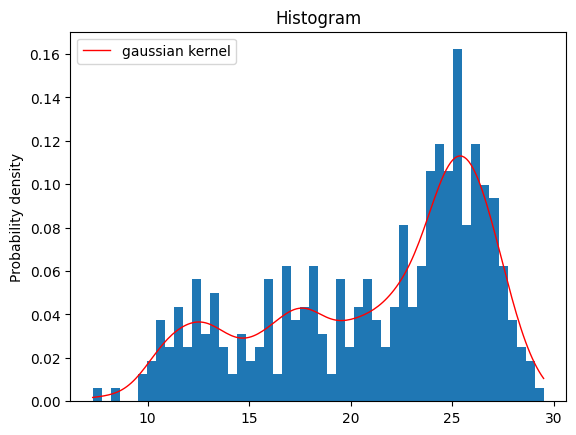

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Data Visualization/Homework_sampledata1.txt'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


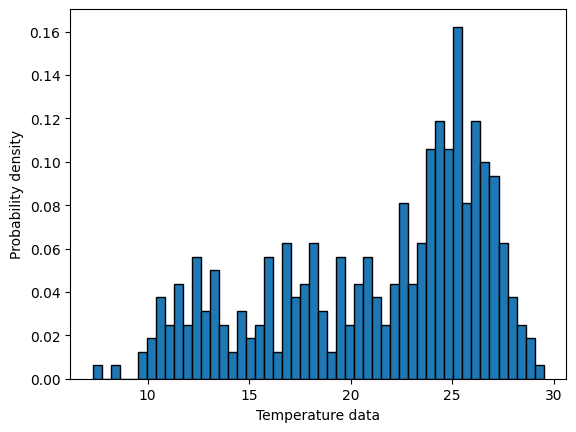

In [ ]:
#--------------------------#
#1. Histogram
#--------------------------#
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
# data=np.loadtxt(file_path,usecols=range(1,13),skiprows=1,dtype=float)
# data=np.where(data==-99.0,np.nan,data)
with open(file_path, 'r') as file:
    lines = file.readlines()
temperature_data=[]
temperature_data2=[]
for line in lines[1:]:
    data = line.strip().split()
    temperature_data.extend([float(temp) if temp != '-99.0' else None for temp in data[1:]])
    temperature_data2.extend([float(temp) if temp != '-99.0' else 0 for temp in data[1:]])
temper_data=[temp for temp in temperature_data if temp is not None]
plt.figure()
plt.hist([temp for temp in temperature_data if temp is not None],50,density=True,edgecolor="black")
plt.ylabel('Probability density')
plt.xlabel('Temperature data')
plt.show()



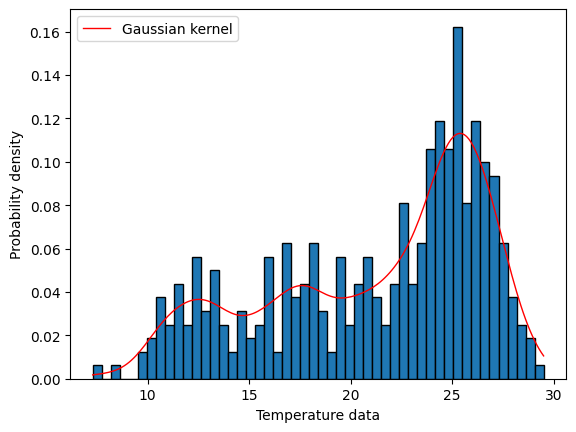

In [ ]:

from sklearn.neighbors import KernelDensity

kde = KernelDensity(kernel='gaussian', bandwidth=1).fit(np.array(temper_data).reshape(361,1))
x_axis = np.linspace(np.min(temper_data), np.max(temper_data), 200)
log_dens = kde.score_samples(x_axis.reshape(200,1))
plt.figure()
plt.plot(x_axis, np.exp(log_dens), color='r', lw=1, linestyle='-', label='Gaussian kernel',)
plt.legend()

plt.hist([temp for temp in temperature_data if temp is not None],50,density=True,edgecolor="black")
plt.ylabel('Probability density')
plt.xlabel('Temperature data')
plt.show()


#--------------------------#
#2. Box plot
#--------------------------#

3. Draw 12 box plots coresponding to 12 months
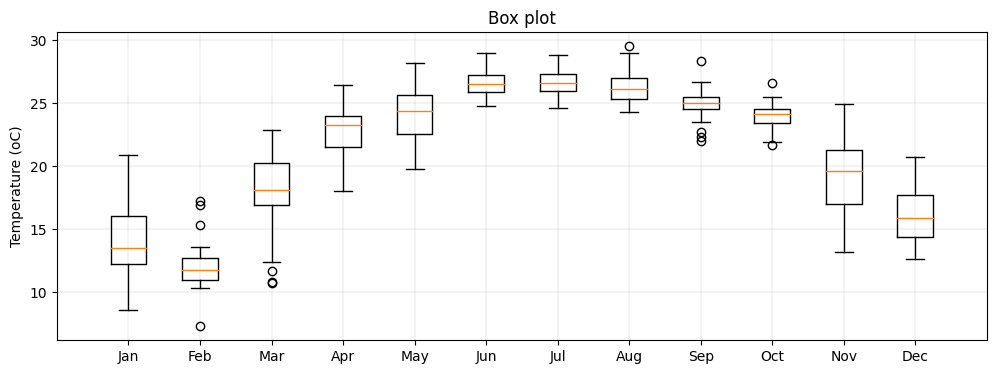

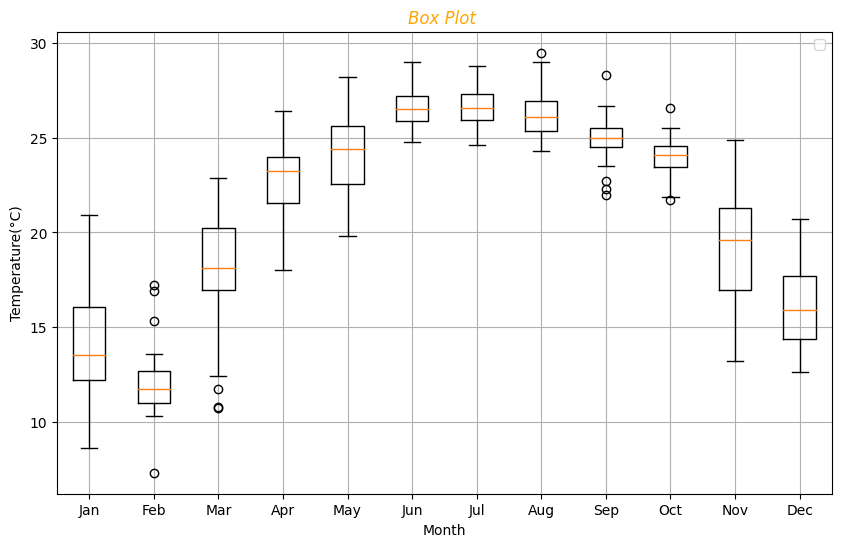

In [ ]:
#--------------------------#
#2. Box plot
#--------------------------#
temp_data=[]
for line in lines[1:]:
  data=line.strip().split()
  temp_data.extend(float(temp) if temp!='-99.0' else None for temp in data[1:])

year_temps=[]
for i in range(12):
  monthly_temp=[temp for temp in temp_data[i::12] if temp is not None]
  year_temps.append(monthly_temp)
group_labels=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
plt.figure(figsize=(10, 6))
plt.boxplot(year_temps, labels=group_labels)
plt.legend()
plt.title('Box Plot ',fontstyle='oblique',color='orange')
plt.xlabel('Month')
plt.ylabel('Temperature(°C)')
plt.grid()

plt.show()



#--------------------------#
#3. Violin plot
#--------------------------#
4. Do similarly for violin plot
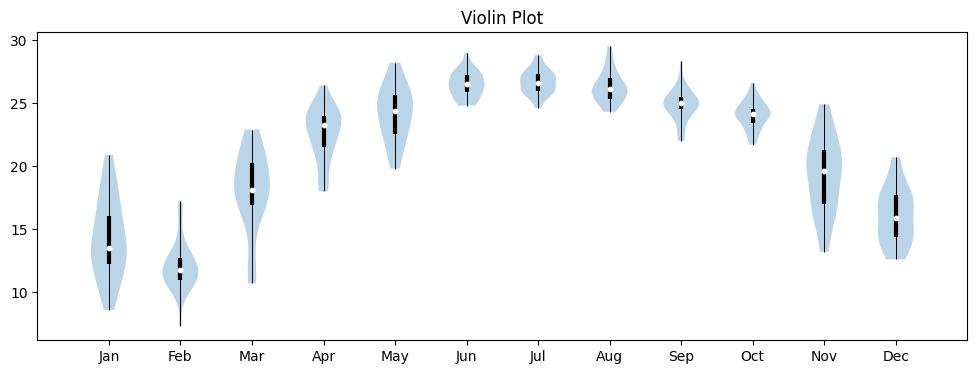

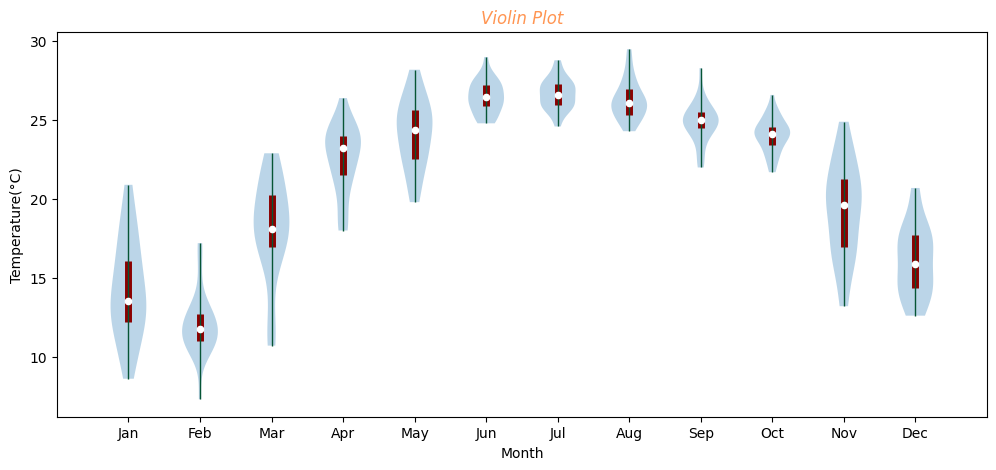

In [ ]:
#--------------------------#
#3. Violin plot
#--------------------------#]

plt.figure(figsize=(12,5))
plt.title('Violin Plot',fontstyle='italic',color='#ff9552')
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10,11,12],labels=group_labels)
plt.violinplot(year_temps,showmeans=False,showmedians=False,showextrema=False)
for k, month_values in enumerate(year_temps, start=1):
    # Draw the interquartile box
    plt.vlines(k, np.percentile(month_values, 25), np.percentile(month_values, 75), color='#8b0000', linestyle='-', lw=5)

    # Draw the tail
    plt.vlines(k, np.min(month_values), np.max(month_values), color='#065535', linestyle='-', lw=1)

    # Draw the median
    plt.scatter(k, np.median(month_values), marker='o', color='white', s=20, zorder=3)
plt.xlabel('Month')
plt.ylabel('Temperature(°C)')
plt.xlim(0.,13)
plt.show()


#--------------------------#
#4. Error bar
#--------------------------#
5. Plot the monthly mean temperature and the error bar. The error bar is defined as +-1 standard deviation from the mean value.
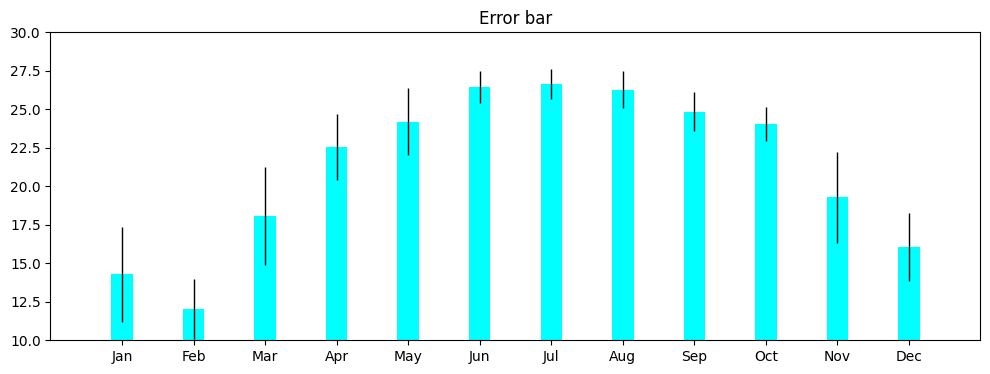

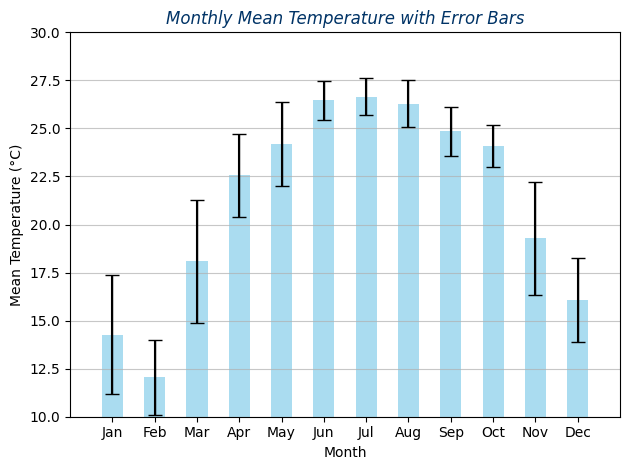

In [ ]:
#--------------------------#
#4. Error bar
#--------------------------#
import matplotlib.pyplot as plt
import numpy as np
temperature_data = []
for line in lines[1:]:
    data = line.strip().split()
    temperature_data.extend([float(temp) if temp != '-99.0' else None for temp in data[1:]])
monthly_means = []
for i in range(12):
    month_temperatures = [temp for temp in temperature_data[i::12] if temp is not None]
    monthly_mean = np.mean(month_temperatures)  # Calculate mean
    monthly_means.append(monthly_mean)
monthly_stdev=[]
for i in range(12):
    month_temperatures = [temp for temp in temperature_data[i::12] if temp is not None]
    monthly_stdevs = np.std(month_temperatures)  # Calculate mean
    monthly_stdev.append(monthly_stdevs)
plt.bar(group_labels,monthly_means,yerr=monthly_stdev,capsize=5,color='skyblue',alpha=0.7,width=0.5)
for i in range (12):
  plt.vlines(i, monthly_means[i] - monthly_stdev[i],monthly_means[i] + monthly_stdev[i] , color='k', linestyle='-', lw=1)
# Add labels and title
plt.xlim(-1,12)
plt.ylim(10,30)
plt.xlabel('Month')
plt.ylabel('Mean Temperature (°C)')
plt.title('Monthly Mean Temperature with Error Bars',fontstyle='oblique',color='#003366')

# Show the plot
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.tight_layout()
plt.show()

---
#--------------------------#
#5. Bar plot - a ranking problem
#--------------------------#
Let's imagine that we have 45 students.
In the final exam, we have math and literature score.

The math score is equal to mid_term * 40% + final * 60%.
Same for the literature score.

The final score is the average of the literature score and math score.

Now, we want to plot the score of each student. However, we want to see the score descending (meaning that the student with highest score will stay on top).

Also, we would like to know more about the top 10 students. Therefore, for the first 3 highest overal rank students, highlight the math and literature score with 1,2, and 3. From 4-10, highlight the component score with a star (*). The student ID is displayed in the left hand of the score bar. The use of panda library is prohibited.

Input file:

(each file has 2 columns, the first column is the midterm score, the second column is the final score)

Literature score:

https://drive.google.com/file/d/1ZTUb80rozqXNj3eC8XSzv0Fc3ytsL8pT/view?usp=sharing

Math score:

https://drive.google.com/file/d/1cn_2wTLzGO45adLCSzqbCbQ6I-U8xtgC/view?usp=sharing

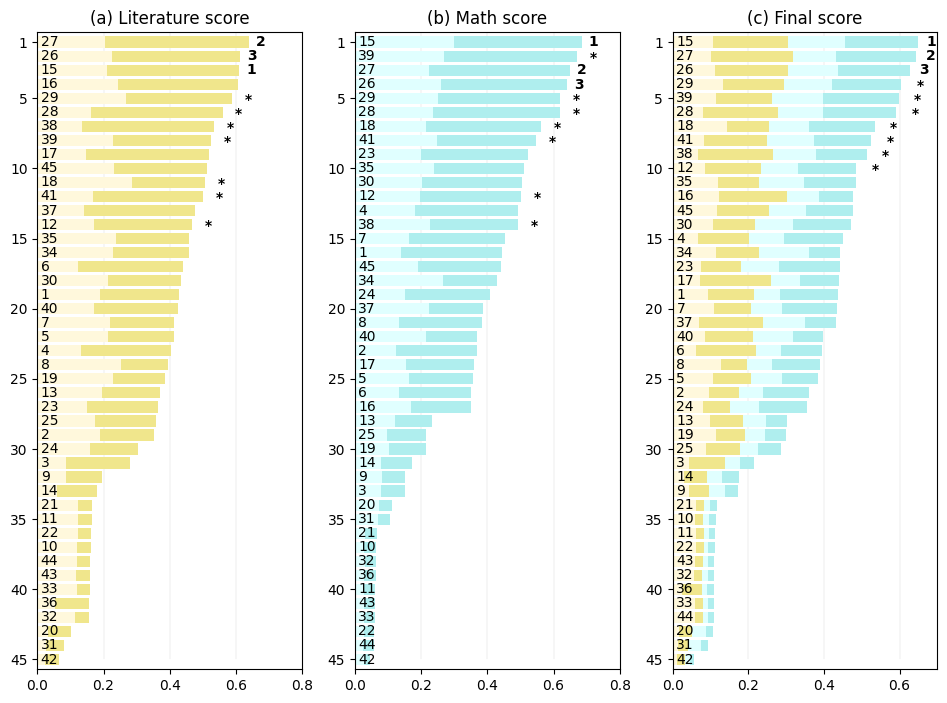

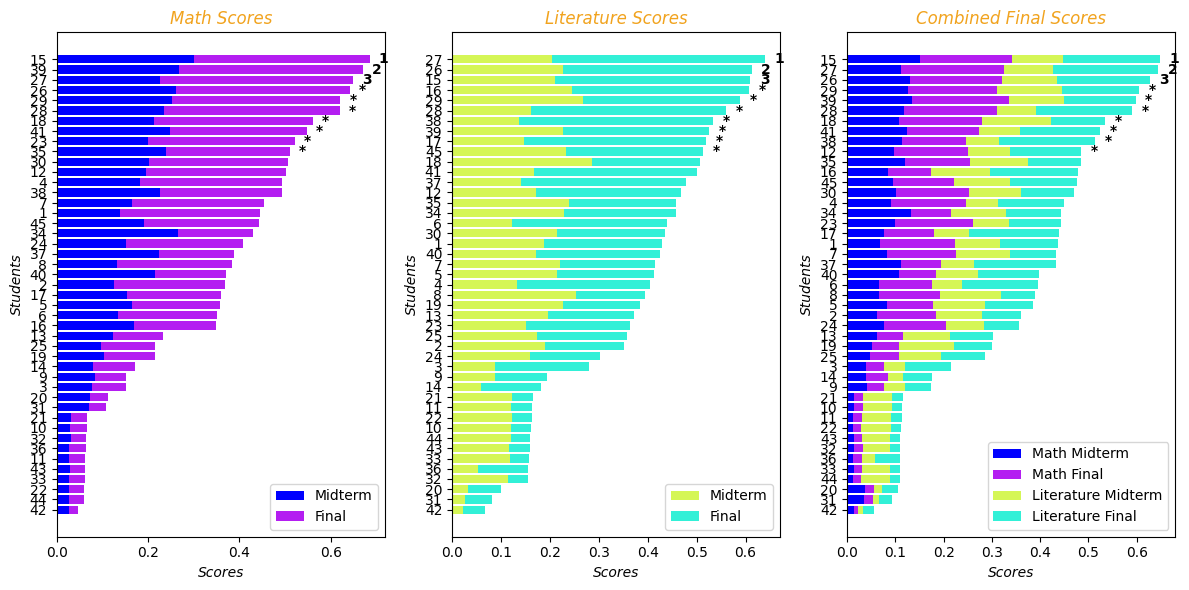

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
file_path_literature = '/content/drive/MyDrive/Data Visualization/HW2_literature_score.txt'
file_path_math='/content/drive/MyDrive/Data Visualization/HW2_math_score.txt'
# Load math and literature scores from text files
with open(file_path_math, 'r') as math_file:
    math_scores = [list(map(float, line.strip().split())) for line in math_file]

with open(file_path_literature, 'r') as lit_file:
    lit_scores = [list(map(float, line.strip().split())) for line in lit_file]
# Function to add rank and asterisk to the bars
def add_rank_st(ax, scores, indices):
    for i, score in enumerate(scores):
        rank_label = ''
        if 43<i<45 :
            rank_label = str(1)
        elif i==43:
            rank_label = str(2)
        elif i==42:
            rank_label = str(3)
        elif 34<i<42:
            rank_label=str('*')
        ax.text(score + 0.02, i, rank_label, va='center', fontsize=10, fontweight='bold', color='black')
# Calculate the final score for math and literature
math_scores = np.array(math_scores)
lit_scores = np.array(lit_scores)

math_midterm_scores = math_scores[:, 0]
math_final_scores = math_scores[:, 1]
lit_midterm_scores = lit_scores[:, 0]
lit_final_scores = lit_scores[:, 1]

# Calculate the combined final scores
total_math_score = 0.4 * math_midterm_scores + 0.6 * math_final_scores
total_literature_score = 0.4 * lit_midterm_scores + 0.6 * lit_final_scores
combined_final_scores = (total_math_score + total_literature_score) / 2

# Sort the indices for each score type in descending order
math_sorted_indices = np.argsort(total_math_score)
lit_sorted_indices = np.argsort(total_literature_score)
combined_sorted_indices = np.argsort(combined_final_scores)

# Sort the scores accordingly
total_math_score_sorted = total_math_score[math_sorted_indices]
total_literature_score_sorted = total_literature_score[lit_sorted_indices]
combined_final_scores_sorted = combined_final_scores[combined_sorted_indices]
#
math_midterm_scores = math_scores[:, 0]*0.4
math_final_scores = math_scores[:, 1]*0.6
lit_midterm_scores = lit_scores[:, 0]*0.4
lit_final_scores = lit_scores[:, 1]*0.6

# Create horizontal stacked bar charts in descending order
plt.figure(figsize=(12, 6))

# Math scores (Midterm and Final)
plt.subplot(131)
plt.barh(range(len(total_math_score_sorted))[::-1], math_midterm_scores[math_sorted_indices][::-1], label='Midterm', color='b')
plt.barh(range(len(total_math_score_sorted))[::-1], math_final_scores[math_sorted_indices][::-1], label='Final', color='#b41ef1', left=math_midterm_scores[math_sorted_indices][::-1])
add_rank_st(plt.gca(), total_math_score_sorted, math_sorted_indices)
plt.ylabel('Students',fontstyle='italic')
plt.xlabel('Scores',fontstyle='italic')
plt.title('Math Scores',fontstyle='oblique',color='#f1a31e')
plt.legend(loc='lower right')
plt.yticks(range(len(total_math_score_sorted))[::-1], [f'{i+1}' for i in math_sorted_indices][::-1])

# Literature scores (Midterm and Final)
plt.subplot(132)
plt.barh(range(len(total_literature_score_sorted))[::-1], lit_midterm_scores[lit_sorted_indices][::-1], label='Midterm', color='#d5f656')
plt.barh(range(len(total_literature_score_sorted))[::-1], lit_final_scores[lit_sorted_indices][::-1], label='Final', color='#32f0d7', left=lit_midterm_scores[lit_sorted_indices][::-1])
add_rank_st(plt.gca(), total_literature_score_sorted, lit_sorted_indices)
plt.ylabel('Students',fontstyle='italic')
plt.xlabel('Scores',fontstyle='italic')
plt.title('Literature Scores',fontstyle='oblique',color='#f1a31e')
plt.legend(loc='lower right')
plt.yticks(range(len(total_literature_score_sorted))[::-1], [f'{i+1}' for i in lit_sorted_indices][::-1])
#
math_midterm_scores = math_scores[:, 0]*0.4/2
math_final_scores = math_scores[:, 1]*0.6/2
lit_midterm_scores = lit_scores[:, 0]*0.4/2
lit_final_scores = lit_scores[:, 1]*0.6/2
# Combined final scores (Math Midterm, Math Final, Lit Midterm, Lit Final)
plt.subplot(133)
plt.barh(range(len(combined_final_scores_sorted))[::-1], math_midterm_scores[combined_sorted_indices][::-1], label='Math Midterm', color='b')
plt.barh(range(len(combined_final_scores_sorted))[::-1], math_final_scores[combined_sorted_indices][::-1], label='Math Final', color='#b41ef1', left=math_midterm_scores[combined_sorted_indices][::-1])
plt.barh(range(len(combined_final_scores_sorted))[::-1], lit_midterm_scores[combined_sorted_indices][::-1], label='Literature Midterm', color='#d5f656', left=np.array(math_midterm_scores[combined_sorted_indices][::-1]) + np.array(math_final_scores[combined_sorted_indices][::-1]))
plt.barh(range(len(combined_final_scores_sorted))[::-1], lit_final_scores[combined_sorted_indices][::-1], label='Literature Final', color='#32f0d7', left=np.array(math_midterm_scores[combined_sorted_indices][::-1]) + np.array(math_final_scores[combined_sorted_indices][::-1]) + np.array(lit_midterm_scores[combined_sorted_indices][::-1]))
add_rank_st(plt.gca(), combined_final_scores_sorted, combined_sorted_indices)
plt.ylabel('Students',fontstyle='italic')
plt.xlabel('Scores',fontstyle='italic')
plt.title('Combined Final Scores',fontstyle='oblique',color='#f1a31e')
plt.legend(loc='lower right')
plt.yticks(range(len(combined_final_scores_sorted))[::-1], [f'{i+1}' for i in combined_sorted_indices][::-1])

plt.tight_layout()

# Show the plot
plt.show()


#--------------------------#
#6. Do the homework 1 again, without using panda
#--------------------------#

Please download the file  Homework_sampledata1.txt from here:

https://drive.google.com/file/d/1rjfXnAh_LT0zwidF40UTM8bP9_7BAI9O/view?usp=sharing

In this file, the first line show the year of the observation.
Then, each row is the number of days in months, from days 1 to days 31, each column is a month, from January to December.

In short, we have daily value of an observation from 01 Jan 2008 to 31 Dec 2008.

Your task is:
1. Plot the daily temperature from 01 Jan 2008 to 31 Dec 2008.

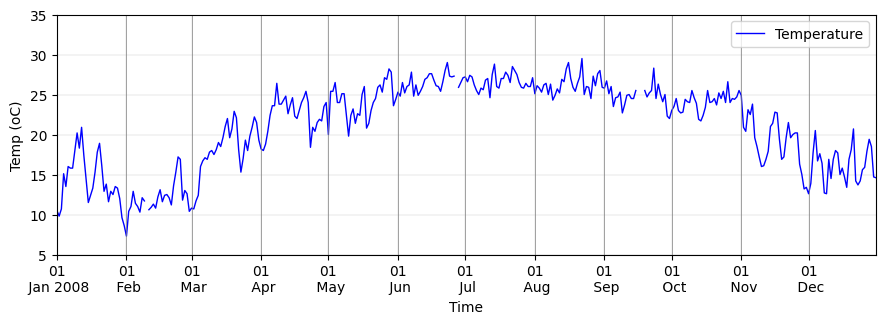

2. Calculate the monthly mean in 2008. Please note that the days in different months are different

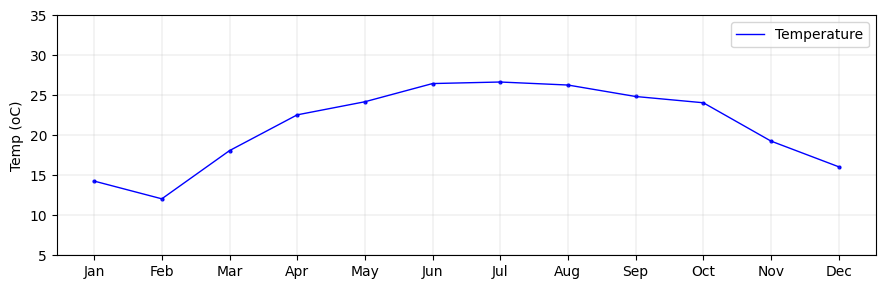

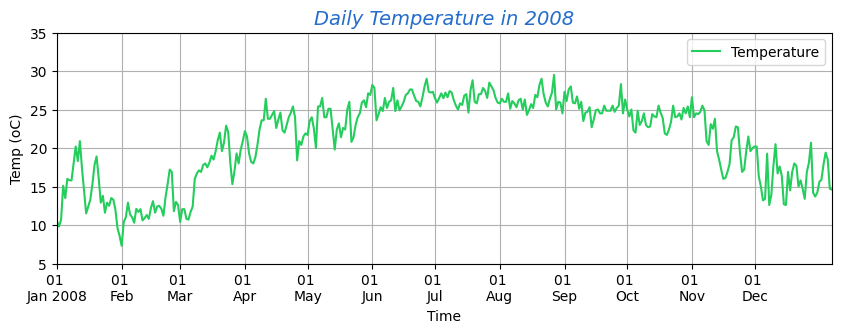

In [ ]:
#--------------------------#
#6. Homework 1 without panda
#--------------------------#
import matplotlib.pyplot as plt
import numpy as np
#rotate the dataset to read the line of daily temperature
temperatur_data = []
for line in lines[1:]:
    cols = line.split()
    row = [float(col) if col != "-99.0" else None for col in cols[1:]]
    temperatur_data.append(row)
tem_data = list(map(list, zip(*temperatur_data)))

# sum of tempertures and number of days in each month
sum_and_days = [(0, 0) for _ in range(12)]

# allocate the value
for i, temp_value in enumerate(tem_data):
    temp_not_none = [temp for temp in temp_value if temp is not None]
    sum_and_days[i] = (sum(temp_not_none), len(temp_not_none))

# replace the missing value in the month with the mean temperature
for i, temp_value in enumerate(tem_data):
    total_sum, total_count = sum_and_days[i]
    avg_temp = total_sum / total_count if total_count > 0 else None
    for j in range(len(temp_value)):
        if temp_value[j] is None:
            temp_value[j] = avg_temp

temps_data = [temp for d_temps in t_data for temp in d_temps if temp is not None]
#plot the time series of daily temperature
plt.figure(figsize=(10, 3))
plt.plot(temps_data, color = '#24cd5c', label='Temperature')
plt.xlabel('Time')
plt.ylabel('Temp (oC)')
plt.yticks(np.arange(5, 40, 5))
days_in_month = [0] + [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
cumulative_days = np.cumsum(days_in_month)
month_starts = [cumulative_days[i] for i in range(12)]
month_labels = ['01 \nJan 2008', '01 \nFeb', '01 \nMar', '01 \nApr', '01 \nMay', '01 \nJun', '01 \nJul', '01 \nAug', '01 \nSep', '01 \nOct', '01 \nNov', '01 \nDec']
plt.title('Daily Temperature in 2008',fontstyle='oblique',fontsize=14,color='#246dcd')
plt.xticks(month_starts, month_labels)
plt.xlim(0, 371)
plt.grid()
plt.legend()
plt.show()

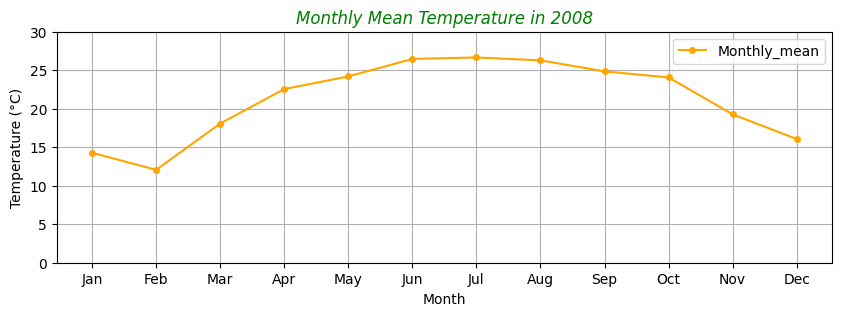

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
temperature_data = []
for line in lines[1:]:
    data = line.strip().split()
    temperature_data.extend([float(temp) if temp != '-99.0' else None for temp in data[1:]])
monthly_means = []
for i in range(12):
    month_temperatures = [temp for temp in temperature_data[i::12] if temp is not None]
    monthly_mean = np.mean(month_temperatures)  # Calculate mean
    monthly_means.append(monthly_mean)
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(10, 3))
plt.plot(month_labels, monthly_means, marker='.', markersize=8, linestyle='-', color='#ffa500')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.legend(['Monthly_mean'])
plt.title('Monthly Mean Temperature in 2008', color='Green',fontstyle='italic')
plt.ylim(0, 30)
plt.grid()
plt.savefig('/content/drive/MyDrive/Figure1_2.png')
plt.show()